In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from pydataset import data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import wrangle_mall as wm

### 1. Clustering with the Iris Dataset

In [2]:
# import data

df = data('iris')

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28


#### a. Choose features other than the ones used in the lesson.

In [6]:
# define independent variables for k-means

X = df[['sepal_area', 'petal_area']]
X.head()

,sepal_area,petal_area
1,17.85,0.28
2,14.70,0.28
3,15.04,0.26
4,14.26,0.30
5,18.00,0.28


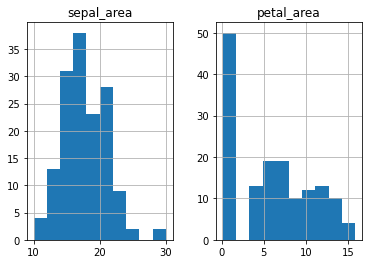

In [7]:
# look at distribution of sepal length and petal_length

X.hist()
plt.show()

In [8]:
# Scale the X

scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [9]:
# look at the head
X_scaled.head()

,sepal_area,petal_area
1,0.392108,0.010787
2,0.234765,0.010787
3,0.251748,0.009518
4,0.212787,0.012056
5,0.399600,0.010787


In [10]:
# sklearn implementation of KMeans on unscaled data

#define the thing
kmeans = KMeans(n_clusters=4, random_state = 123)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [31]:
# sklearn implementation of KMeans on scaled data

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1], dtype=int32)

In [32]:
# make a new column names cluster in original df and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [33]:
# lets look at sample of 15 randomly selected rows in iris dataset

df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster,cen_x,cen_y,c
69,6.2,2.2,4.5,1.5,versicolor,13.64,6.75,2,4.944828,14.380000,#81DF20
117,6.5,3.0,5.5,1.8,virginica,19.50,9.90,1,8.002619,18.246429,#DF2020
20,5.1,3.8,1.5,0.3,setosa,19.38,0.45,0,0.365600,17.257800,#2095DF
61,5.0,2.0,3.5,1.0,versicolor,10.00,3.50,2,4.944828,14.380000,#81DF20
88,6.3,2.3,4.4,1.3,versicolor,14.49,5.72,2,4.944828,14.380000,#81DF20
23,4.6,3.6,1.0,0.2,setosa,16.56,0.20,0,0.365600,17.257800,#2095DF
57,6.3,3.3,4.7,1.6,versicolor,20.79,7.52,1,8.002619,18.246429,#DF2020
118,7.7,3.8,6.7,2.2,virginica,29.26,14.74,2,NaN,NaN,NaN
132,7.9,3.8,6.4,2.0,virginica,30.02,12.80,2,NaN,NaN,NaN
129,6.4,2.8,5.6,2.1,virginica,17.92,11.76,2,NaN,NaN,NaN


In [36]:
def viz_iris(df, kmeans):
    
    centroids = np.array(df.groupby('cluster')['petal_area', 'sepal_area'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    colors = ['#DF2020','#2095DF', '#81DF20' ]
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    #plot scatter chart for Actual species and those predicted by K - Means

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    #plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = df, x = 'petal_area', y = 'sepal_area', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(df.petal_area, df.sepal_area, c=df.c, alpha = 0.6)
    ax2.set(xlabel = 'petal_area', ylabel = 'sepal_area', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    df.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()


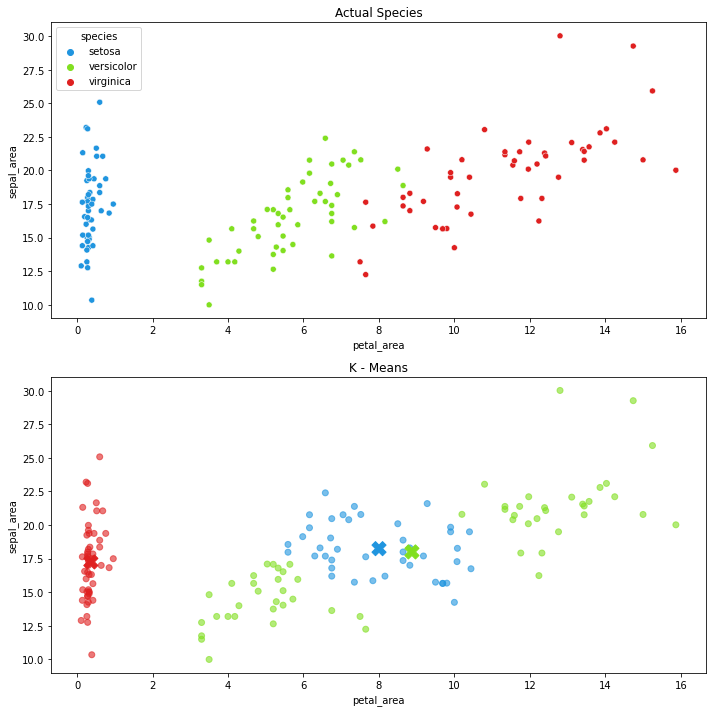

In [37]:
viz_iris(df, kmeans)

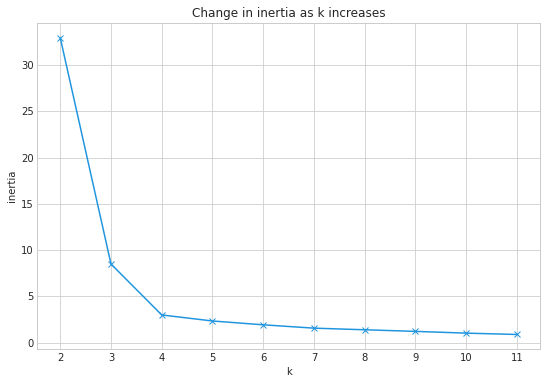

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

- looks like best k will be 4

## 4. Repeat the clustering, this time with 3 different features.

In [39]:
# define independent variables for k-means

X2 = df[['petal_length', 'petal_width','petal_area']]
X2.head()

,petal_length,petal_width,petal_area
1,1.4,0.2,0.28
2,1.4,0.2,0.28
3,1.3,0.2,0.26
4,1.5,0.2,0.30
5,1.4,0.2,0.28


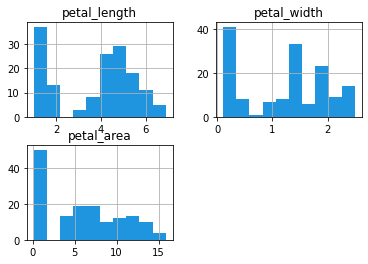

In [41]:
# look at distribution of X2

X2.hist()
plt.show()

In [42]:
# Scale the X

scaler2 = MinMaxScaler().fit(X2)
X2_scaled = pd.DataFrame(scaler2.transform(X2), columns= X2.columns).set_index([X2.index.values])

In [43]:
# look at the head
X2_scaled.head()

,petal_length,petal_width,petal_area
1,0.067797,0.041667,0.010787
2,0.067797,0.041667,0.010787
3,0.050847,0.041667,0.009518
4,0.084746,0.041667,0.012056
5,0.067797,0.041667,0.010787


In [54]:
# sklearn implementation of KMeans on scaled data

#define the thing
kmeans2 = KMeans(n_clusters=4, random_state = 123)

# fit the thing
kmeans2.fit(X2_scaled)

# Use (predict using) the thing 
kmeans2.predict(X2_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3], dtype=int32)

In [55]:
# make a new column names cluster in original df and X2_scaled dataframe

df['cluster2'] = kmeans2.predict(X2_scaled)

X2_scaled['cluster2'] = kmeans2.predict(X2_scaled)

In [57]:
# lets look at sample of 15 randomly selected rows in iris dataset

df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster,cluster2
22,5.1,3.7,1.5,0.4,setosa,18.87,0.60,0,0
93,5.8,2.6,4.0,1.2,versicolor,15.08,4.80,2,2
44,5.0,3.5,1.6,0.6,setosa,17.50,0.96,0,0
31,4.8,3.1,1.6,0.2,setosa,14.88,0.32,0,0
71,5.9,3.2,4.8,1.8,versicolor,18.88,8.64,1,3
91,5.5,2.6,4.4,1.2,versicolor,14.30,5.28,2,2
85,5.4,3.0,4.5,1.5,versicolor,16.20,6.75,1,2
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30,0,0
108,7.3,2.9,6.3,1.8,virginica,21.17,11.34,2,1
101,6.3,3.3,6.0,2.5,virginica,20.79,15.00,2,1


In [58]:
def viz_iris2(df, kmeans):
    
    centroids = np.array(df.groupby('cluster')['petal_length', 'petal_width'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    colors = ['#DF2020','#2095DF', '#81DF20' ]
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    #plot scatter chart for Actual species and those predicted by K - Means

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    #plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(df.petal_length, df.petal_width, c=df.c, alpha = 0.6)
    ax2.set(xlabel = 'petal_length', ylabel = 'petal_width', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    df.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()


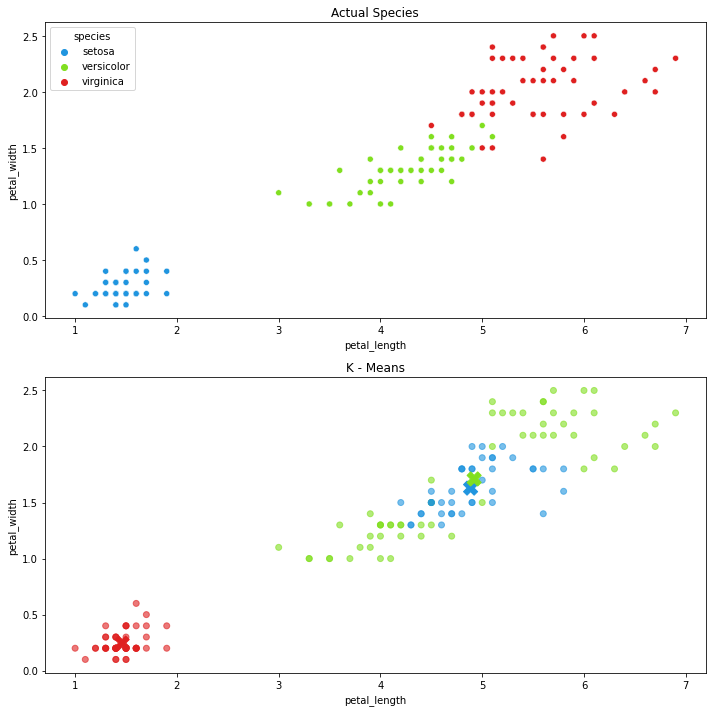

In [59]:
viz_iris2(df, kmeans2)

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [2]:
# acquire df
mall = wm.get_mallcustomer_data()

In [3]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# define independent variables for k-means

X3 = mall[[ 'annual_income', 'spending_score']]
X3.head()

,annual_income,spending_score
customer_id,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


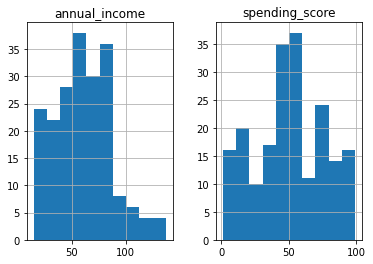

In [5]:
# look at distribution of features

X3.hist()
plt.show()

In [6]:
# Scale the X

scaler3 = StandardScaler().fit(X3)
X3_scaled = pd.DataFrame(scaler3.transform(X3), columns= X3.columns).set_index([X3.index.values])

In [7]:
# look at the head
X3_scaled.head()

,annual_income,spending_score
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


In [8]:
# sklearn implementation of KMeans on scaled data

#define the thing
kmeans3 = KMeans(n_clusters=5, random_state = 123)

# fit the thing
kmeans3.fit(X3_scaled)

# Use (predict using) the thing 
kmeans3.predict(X3_scaled)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [9]:
# make a new column names cluster in original df and X_scaled dataframe

mall['cluster'] = kmeans3.predict(X3_scaled)

X3_scaled['cluster'] = kmeans3.predict(X3_scaled)

In [10]:
# lets look at sample of 15 randomly selected rows in iris dataset

mall.sample(15)

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
8,Female,23,18,94,4
175,Female,52,88,13,1
143,Female,28,76,40,2
56,Male,47,43,41,2
92,Male,18,59,41,2
33,Male,53,33,4,0
17,Female,35,21,35,0
174,Male,36,87,92,3
94,Female,40,60,40,2


In [11]:
X3_scaled.sample(15)

,annual_income,spending_score,cluster
61,-0.555747,0.225165,2
56,-0.670255,-0.357158,2
150,0.665675,1.545098,3
140,0.512997,0.846310,3
71,-0.441239,0.186343,2
117,0.169472,-0.279515,2
73,-0.403069,-0.046586,2
158,0.665675,1.079239,3
1,-1.738999,-0.434801,0
47,-0.784763,0.186343,2


In [12]:
# Cluster Centers aka centroids. The output is scaled!!
kmeans3.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788]])

In [13]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans3.cluster_centers_, columns = X3.columns)
centroids_scaled


,annual_income,spending_score
0,-1.307519,-1.136965
1,1.055003,-1.284439
2,-0.200913,-0.026456
3,0.991583,1.239503
4,-1.329545,1.132178


In [14]:
# Centriods for unscaled data?
centroids = mall.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
0,26.304348,20.913043
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,25.727273,79.363636


In [15]:
kmeans3.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

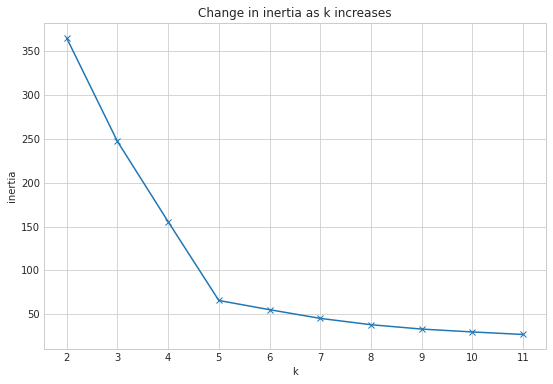

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X3_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    


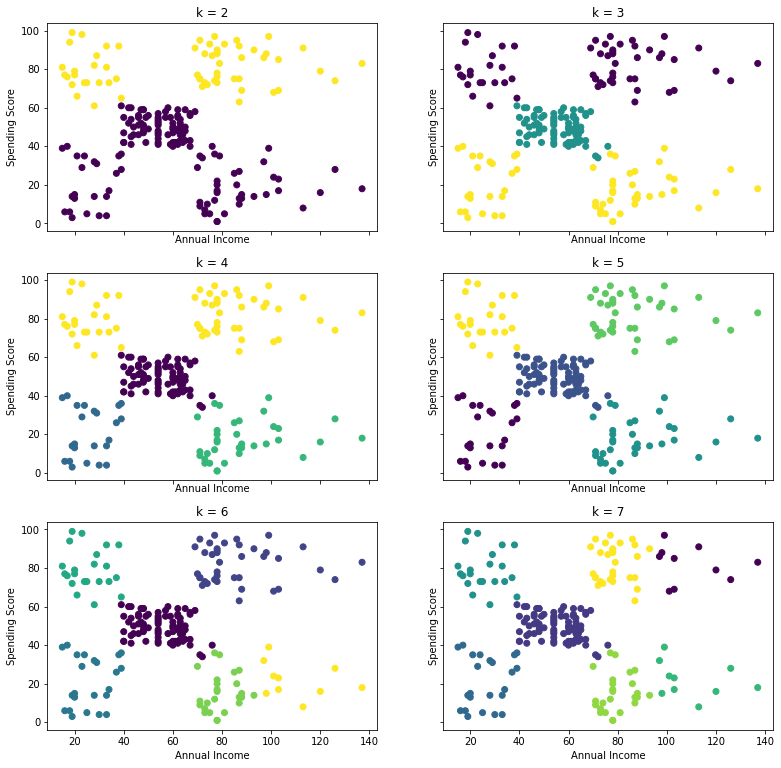

In [18]:

fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X3_scaled).predict(X3_scaled)
    ax.scatter(X3.annual_income, X3.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Annual Income', ylabel='Spending Score')

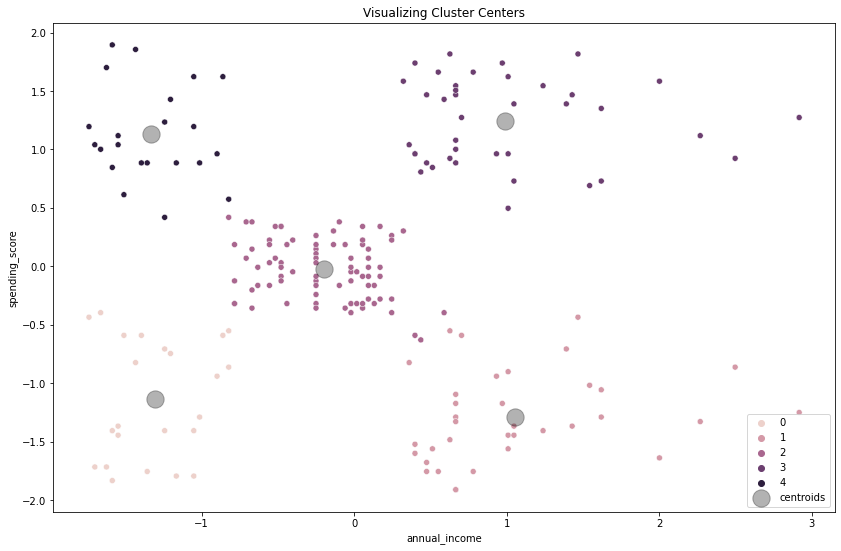

In [22]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'annual_income', y ='spending_score', data = X3_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'annual_income', y = 'spending_score',
                             ax = plt.gca(),
                             s= 300,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend()

In [23]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
mall['cluster'] = 'cluster_' + mall.cluster.astype(str)
mall.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,cluster_0
2,Male,21,15,81,cluster_4
3,Female,20,16,6,cluster_0
4,Female,23,16,77,cluster_4
5,Female,31,17,40,cluster_0


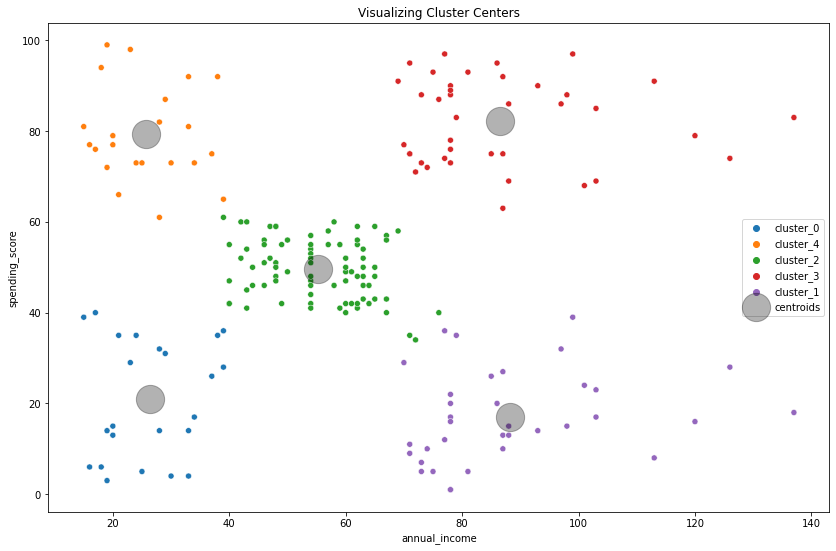

In [25]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'annual_income', y ='spending_score', data = mall, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'annual_income', y = 'spending_score',
                             ax = plt.gca(),
                             s= 800,
                            marker = 'o',
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend()